<a href="https://colab.research.google.com/github/sgathai/Capstone-_workings-/blob/main/Final_Capstone_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT

Group 4 collaborators:

- Tony Munene
- Loise Mbago
- Immanuel Omondi
- Nazra Nyangwara
- Bahati Ndwiga
- Cleophas Opati
- Stephen Gathai - Team Lead

# DEEP LEARNING IN BREAST CANCER DETECTION

## 1.0 Business Understanding

### 1.1 Background

Breast cancer ranks as the most common cancer globally and the second leading cause of cancer-related deaths. According to the World Health Organization (WHO), breast cancer is the primary cause of mortality among women aged between 45-55 years with an incidence of 1 in 8 women. Early detection and timely intervention play a pivotal role in the prognosis of breast cancer. When detected early, and if adequate diagnosis and treatment are available, the chances of survival increase significantly. Thus, the importance of early detection cannot be overstated, as it can lead to more effective treatments, reduced intervention procedures, and ultimately, lower the risk of breast-cancer-related deaths considerably. Mammography and ultrasound are the primary imaging modalities for the early breast cancer diagnosis. However, these modalities are limited in the extent to which they facilitate early diagnosis. First, follow-up ultrasound, aspiration, or biopsy may need to be performed after a breast ultrasound image is interpreted to determine whether a suspicious abnormality is cancer. Often, most of the suspected problem locations detected by ultrasonography that require biopsy are noncancerous (false positives). Second, many tumors cannot be detected via ultrasonography and annual mammography is still recommended. However, in mammography, some early breast tumors simply manifest as calcifications and go undetected. Therefore, more sophisticated tools are required to overcome the limitations of ultrasound in the early detection of breast cancer.

### 1.2 Problem Statement
The Breast Cancer Research Foundation(BCRF) is seeking to advance breast cancer research by harnessing deep learning to transform early detection and intervention in breast cancer treatment and management. They have engaged our services to design and implement a cutting-edge Deep Learning-Based Breast Cancer Prediction System (DL-BCPS) capable of analyzing medical imaging data, including mammograms and ultrasound images to accurately predict the presence of breast cancer in patients. Through the DL-BCPS, BCRF aims to revolutionize breast cancer research, significantly enhancing both the precision and efficiency of breast cancer diagnosis and providing healthcare professionals with a valuable tool to facilitate timely medical intervention, improve patient outcomes, and support decision-making.

### 1.3 Objectives
- To develop a deep learning model using medical imaging data capable of efficient segmentation of breast masses in ultrasound images.

- To determine specific parameters and features within the medical imaging data that are most indicative of early-stage breast cancer to improve the model's ability to detect cancer at its earliest stages.

- To establish a timeline for medical intervention based on the model's predictions, ensuring that cases with a high likelihood of breast cancer are flagged promptly for further examination and diagnosis.

- To implement a user-friendly interface for healthcare professionals to upload medical images and receive predictions from the DL-BCPS.

### 1.4 Success Criteria
The model should:
- Achieve a classification accuracy of at least 85% on the test dataset.
- Achieve a sensitivity of at least 95% and a specificity of at least 90%
- Have a high F1-score to ensure a balance between precision and recall.
- Demonstrate good generalization by performing well on unseen data.

## 2.0 Data Understanding

The [Breast Ultrasound Images Dataset](https://scholar.cu.edu.eg/?q=afahmy/pages/dataset) includes breast ultrasound images from 600 female patients aged between 25 and 75 years. The dataset consists of 780 images with an average image size of 500 × 500 pixels. The images are in PNG format.

The data is categorized into three sets:

- Benign: This set contains 437 images.
- Malignant: This set contains 210 images.
- Normal: This set contains 133 images.

# Import relevant Libraries

Below are  list of imported modules and functions,  related to building, training, evaluating, and visualizing deep learning models for image classification tasks. The combination of these libraries allows for:

Data loading and preprocessing (using OpenCV, PIL, and TensorFlow's preprocessing tools).
Model building and training (using TensorFlow/Keras).
Performance evaluation (using scikit-learn metrics).
Visualization of results and data (using matplotlib and seaborn).
Using these libraries together provides a comprehensive environment for developing deep learning models for image data.

In [ ]:
# Import relevant libraries
import os
import random
import warnings
from itertools import chain
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.applications import DenseNet121, InceptionV3, MobileNetV2, ResNet50, VGG16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


# Loading datasets and defining paths to the directory.

This ensures Data Accessibility for  further processing, training, or analysis./Organization makes  it's clear which path corresponds to which type of image and also Flexibility is achieved.


In [ ]:
# Load the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

# Defining paths to the directories
normal_path = '/content/drive/MyDrive/Breast_cancer_dataset/normal'
benign_path = '/content/drive/MyDrive/Breast_cancer_dataset/benign'
malignant_path = '/content/drive/MyDrive/Breast_cancer_dataset/malignant'
image_dir = '/content/drive/MyDrive/Breast_cancer_dataset'

Mounted at /content/drive


# Preview and or Display of sample images
In summary, these lines of code achieve the objective of giving the user a visual representation of the dataset's content. It ensures that the data is correctly loaded and offers an initial insight into the images' characteristics across different categories. This is an essential step in any image processing or machine learning project, as understanding and validating of data is crucial before diving into model training or further analysis.

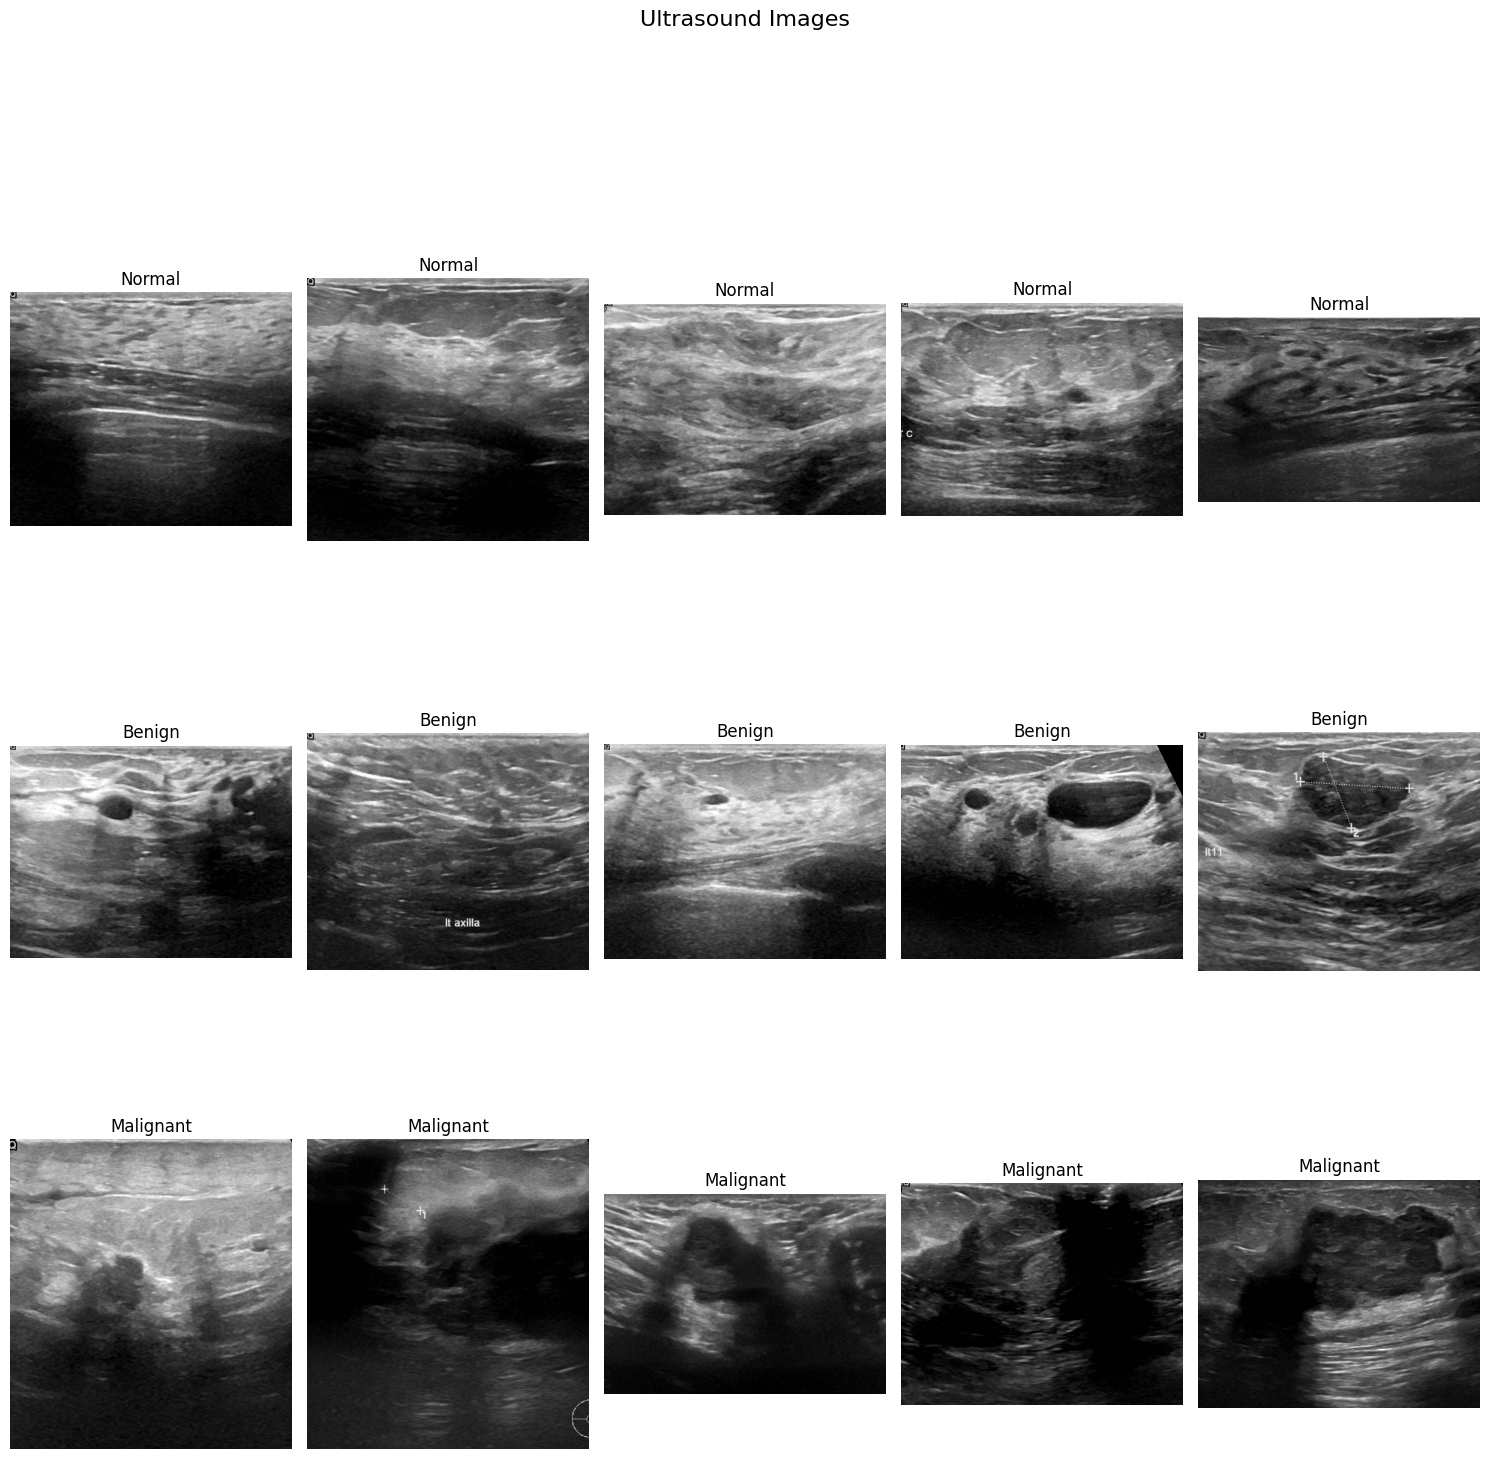

In [ ]:
# Preview sample images

# Create dictionary for categories and paths
categories_paths = {
    'normal': normal_path,
    'benign': benign_path,
    'malignant': malignant_path
}

# Randomly sample 5 images from each category
normal_images = [os.path.join(normal_path, fname) for fname in random.sample(os.listdir(normal_path), 5)]
benign_images = [os.path.join(benign_path, fname) for fname in random.sample(os.listdir(benign_path), 5)]
malignant_images = [os.path.join(malignant_path, fname) for fname in random.sample(os.listdir(malignant_path), 5)]

# Plot images
fig, axes = plt.subplots(3, 5, figsize=(15, 15))
fig.suptitle('Ultrasound Images', fontsize=16, y=1.05)

# Display benign images
for ax, img_path in zip(axes[0], normal_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Normal")
    ax.axis('off')

# Display malignant images
for ax, img_path in zip(axes[1], benign_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Benign")
    ax.axis('off')

# Display normal images
for ax, img_path in zip(axes[2], malignant_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Malignant")
    ax.axis('off')

plt.tight_layout()
plt.show()


Observations:
- The images are already in grayscale hence we will not need to convert them to grayscale
- The images are in different sizes and will need to be resized

# Checking for missing or corrupt Images
The provided code is meant to ensure the dataset's integrity by identifying and reporting any corrupt or unreadable image files. This is an essential preparatory step in  image-related project, ensuring a smooth and error-free processing, analysis, or training phase and thus saving on time which results to quality work.

In [ ]:
# Check for missing or corrupt images

def check_images(directory):

    corrupt_files = []
    # List all files in the directory
    files = os.listdir(directory)
    for file in files:
        file_path = os.path.join(directory, file)
        try:
            # Try to open the image
            with Image.open(file_path) as img:
                # Check if the image is complete
                img.verify()
        except (IOError, SyntaxError) as e:
            corrupt_files.append(file_path)

    return corrupt_files

# Check each directory for corrupt or missing images
corrupt_normal = check_images(normal_path)
corrupt_benign = check_images(benign_path)
corrupt_malignant = check_images(malignant_path)

# Output the corrupt or missing files
corrupt_files = corrupt_normal + corrupt_benign + corrupt_malignant
if corrupt_files:
    print("Corrupt or missing files:")
    for file_path in corrupt_files:
        print(f" - {file_path}")
else:
    print("No corrupt or missing files found.")


No corrupt or missing files found.


### Image sizes

In this section, we analyze the dimensions of the images in the dataset. Understanding the variation in image sizes will inform the decision on whether to resize images for model training and what target dimensions to use.

Objectives:

The code's main objective is to provide an understanding of the distribution of image sizes within each category of the breast cancer dataset. This is important because images with significantly different sizes may require preprocessing (resizing, cropping) before being used as inputs to a machine learning model.

It assists in identifying potential anomalies or outliers in image sizes, which could indicate data quality issues or errors in the dataset.

The visualizations help data analysts and model developers gain insights into the dataset's characteristics, which can inform decisions related to data preprocessing, model architecture, and training strategies.

By visualizing the image size distribution, one can ensure that the dataset is suitable for further analysis and modeling and thus make informed decisions about how to handle images of varying sizes during the model-building process.

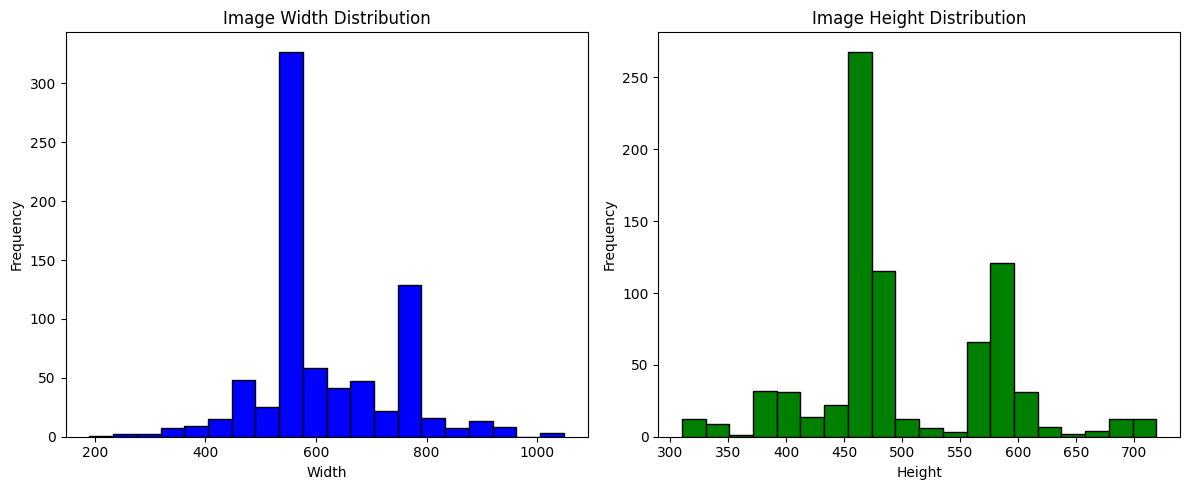

In [ ]:
# Initialize lists to store widths and heights
widths = []
heights = []

# Loop over each category and path
for category, path in categories_paths.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Get the dimensions
        h, w = img.shape
        widths.append(w)
        heights.append(h)

# Plot the Image Size Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(widths, bins=20, color='blue', edgecolor='black')
axes[0].set_title('Image Width Distribution')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')

axes[1].hist(heights, bins=20, color='green', edgecolor='black')
axes[1].set_title('Image Height Distribution')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Class distribution

In summary, these lines of code help us to quickly assess the class distribution within the breast cancer dataset. Understanding the distribution is crucial because an imbalanced dataset (where one class has significantly fewer samples than others) can affect the performance and bias of machine learning models. Visualizing the distribution with a bar chart makes it easy to see if any class requires oversampling, undersampling, or other techniques to address class imbalance.

Number of images for each class:
Normal: 133
Benign: 437
Malignant: 210


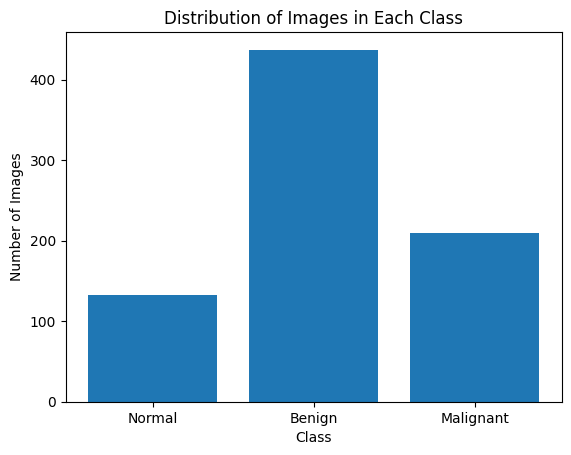

In [ ]:
# Get the list of files in each directory
normal_images = os.listdir(normal_path)
benign_images = os.listdir(benign_path)
malignant_images = os.listdir(malignant_path)

# Count the number of images in each class
num_normal_images = len(normal_images)
num_benign_images = len(benign_images)
num_malignant_images = len(malignant_images)

# Print the counts
print("Number of images for each class:")
print("Normal:", num_normal_images)
print("Benign:", num_benign_images)
print("Malignant:", num_malignant_images)

# Plot a bar chart to visualize the distribution
classes = ['Normal', 'Benign', 'Malignant']
counts = [num_normal_images, num_benign_images, num_malignant_images]

plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class')
plt.show()

Observation:
- The output above reveals a noticeable class imbalance in the dataset. The benign category is significantly overrepresented compared to the normal and malignant categories. This imbalance will need to be addressed to ensure the model provides a reliable and generalized performance across all classes.

### Mask analysis

In summary, these lines of code are essential for the preprocessing and feature extraction stage of a breast cancer predictive model. They apply masks to isolate potential cancerous regions within medical images, which is an essential step in extracting relevant features for training a machine learning model to classify breast cancer images accurately. The visual analysis of masks helps assess the quality of this preprocessing step.

By applying mask analysis to normal images, one can assess how well the masking technique distinguishes between cancerous and non-cancerous regions. It's a crucial step in the development of a breast cancer predictive model because it helps in identifying and isolating the relevant features for classification.

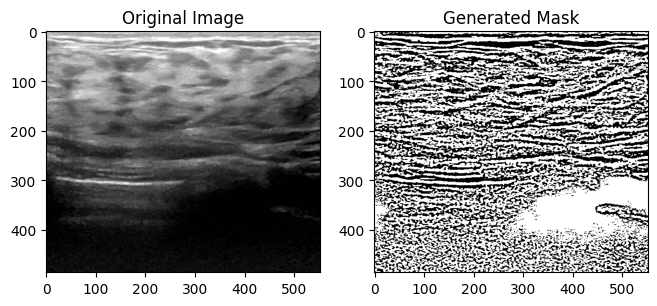

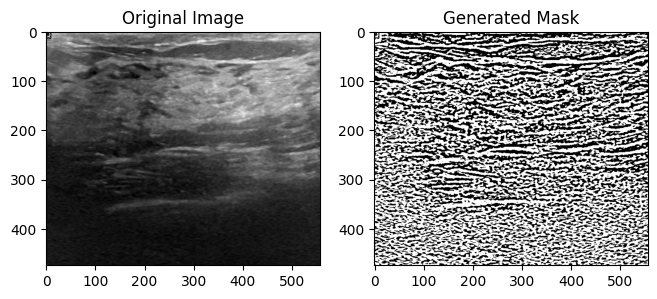

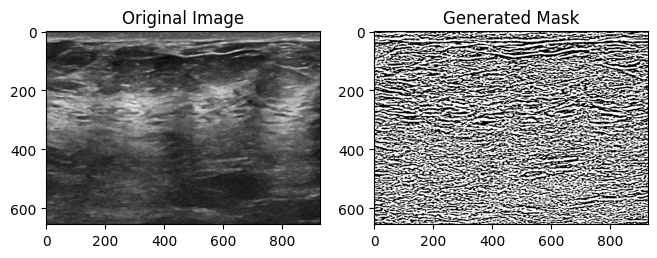

In [ ]:
# Define function to apply masks to original images
def apply_masks(images):
    masked_images = []
    for img in images:
        masked_img = cv2.bitwise_and(img, img, mask=img)
        masked_images.append(masked_img)
    return masked_images

def mask_analysis(image_path):
    try:
        # Get image files in the specified path
        image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if f.endswith('.png')]

        # Load images in grayscale
        images = [cv2.imread(img_f, cv2.IMREAD_GRAYSCALE) for img_f in image_files]

        # Apply adaptive thresholding to isolate cancerous regions
        masks = []
        for img in images:
            mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
            masks.append(mask)

            # Set all non-cancerous regions to black
            mask[mask != 255] = 0

        # Display original images and masked images for a sample of three images
        for i in range(3):
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(images[i], cmap='gray')
            plt.title('Original Image')

            plt.subplot(1, 3, 2)
            plt.imshow(masks[i], cmap='gray')
            plt.title('Generated Mask')

            plt.show()
    except Exception as e:
        print(f"Error processing images in {image_path}: {e}")

# Display masks of normal images
mask_analysis(normal_path)

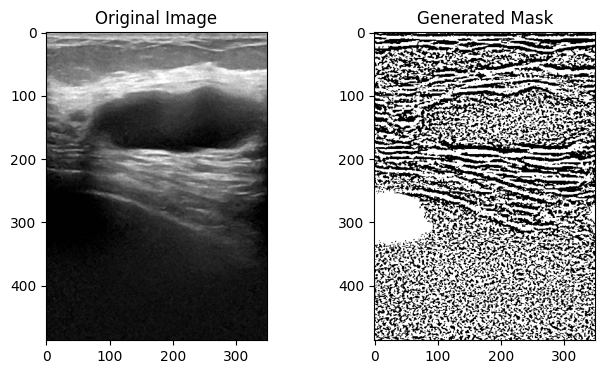

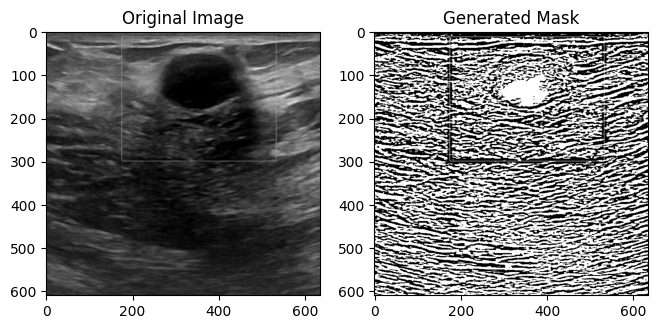

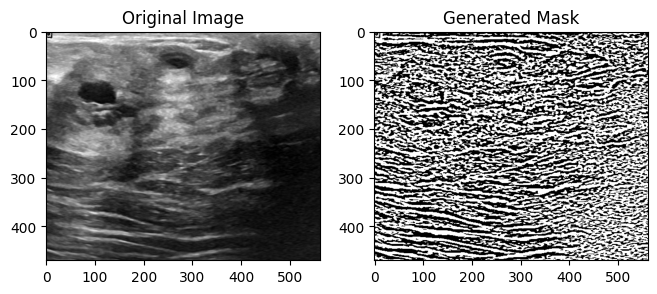

In [ ]:
# Display masks of benign images
mask_analysis(benign_path)

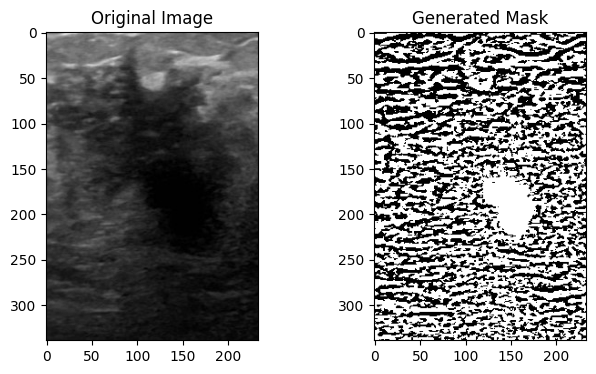

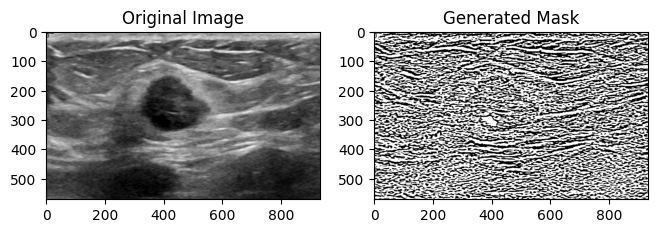

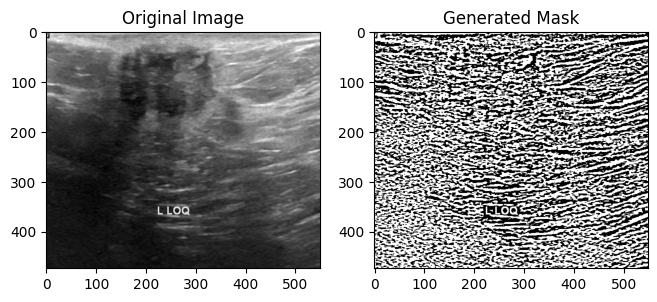

In [ ]:
# Display masks of malignant images
mask_analysis(malignant_path)

## 3.0 Data Preparation

In this section, we will perform several preprocessing steps on the images to prepare them for training. This includes:
- Resizing the images to a consistent size
- Normalizing the pixel values to a range between 0 and 1
- Creating labels for each set
- Addressing class imbalance in the dataset
- Applying data augmentation techniques to increase the variability and size of the training dataset

### a. Resize and normalize images
In summary, these lines of code are crucial for the data preparation and exploration phase of building a breast cancer predictive model. They ensure that the images are in the correct format and size for model input and provide a visual check to confirm the quality of the preprocessing steps. This is a critical step in the overall process of training and evaluating a machine learning model.

In [ ]:
# Resize images to 224x224 pixels
img_size = (224, 224)

def load_images(directory):
    images = []
    for fname in os.listdir(directory):
        filepath = os.path.join(directory, fname)
        img = Image.open(filepath)
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

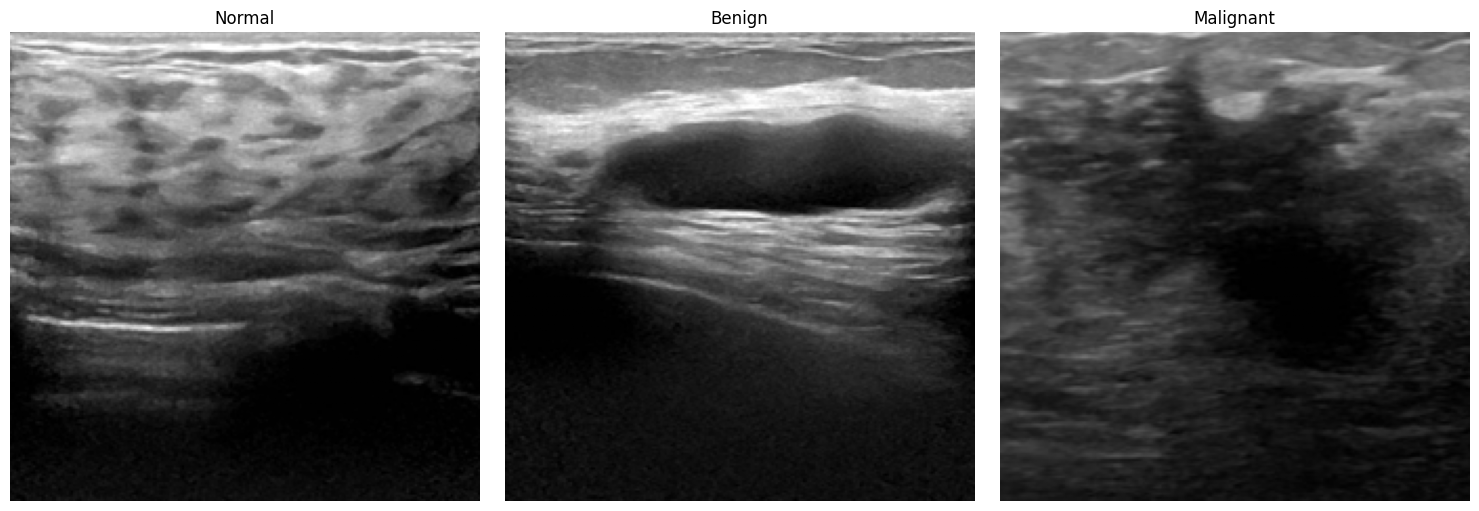

In [ ]:
#Display images after resizing and normalizing

# Load images from each category
normal_images = load_images(normal_path)
benign_images = load_images(benign_path)
malignant_images = load_images(malignant_path)

# Display the first image from each category
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(normal_images[0])
axes[0].set_title('Normal')
axes[0].axis('off')

axes[1].imshow(benign_images[0])
axes[1].set_title('Benign')
axes[1].axis('off')

axes[2].imshow(malignant_images[0])
axes[2].set_title('Malignant')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### b. Image feature analysis
Feature extraction is crucial in image analysis because it helps represent images in a more meaningful and concise manner. Shape features, in particular, can be important for distinguishing between different objects or regions of interest within images. These features provide quantitative information about the shape and structure of objects, which can be valuable for classification tasks.In medical image analysis, features play a critical role in the automatic detection and classification of diseases or abnormalities, such as breast cancer.

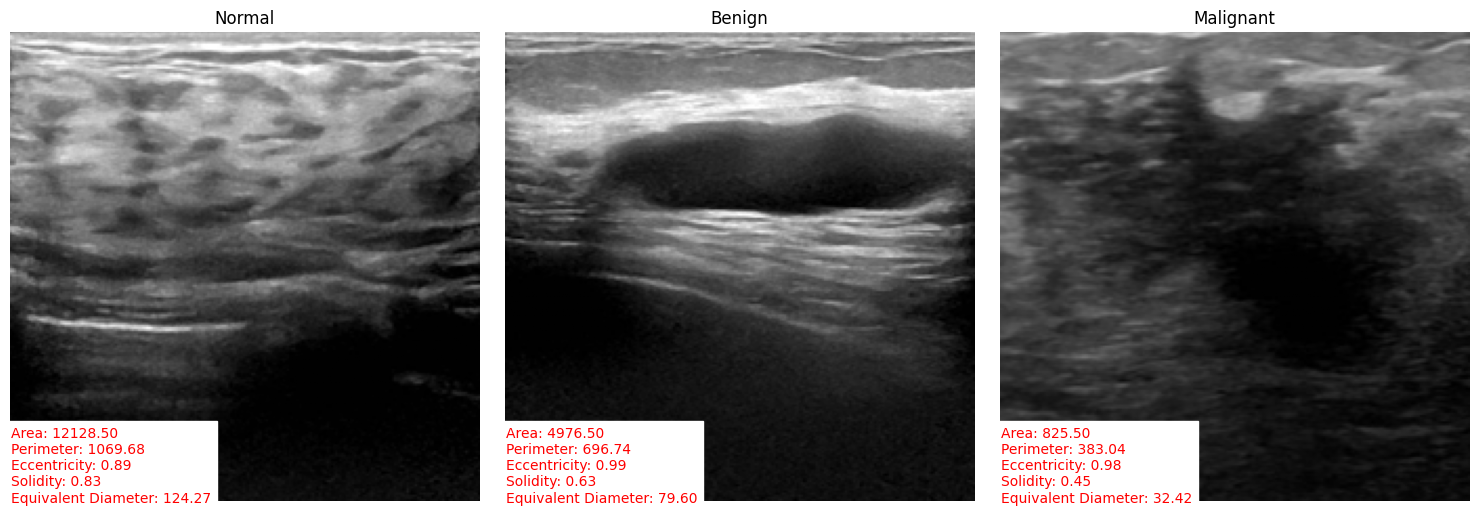

In [ ]:
# Extract shape features from the images
def extract_shape_features(image):
    # Convert the image to float32
    if image.dtype == np.float64:
        image = image.astype(np.float32)

    # Ensure the image is in grayscale format
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the image to uint8 type and scale it to 0-255
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)

    # Apply binary thresholding
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours are detected, return None
    if not contours:
        return None

    # Get the largest contour
    contour = max(contours, key=cv2.contourArea)

    # Extract shape features
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    try:
        ellipse = cv2.fitEllipse(contour)
        (center, axes, orientation) = ellipse
        major_axis_length = max(axes)
        minor_axis_length = min(axes)
        eccentricity = np.sqrt(1 - (minor_axis_length / major_axis_length)**2)
    except:
        eccentricity = 0

    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area

    equivalent_diameter = np.sqrt(4 * area / np.pi)

    return {
        "Area": area,
        "Perimeter": perimeter,
        "Eccentricity": eccentricity,
        "Solidity": solidity,
        "Equivalent Diameter": equivalent_diameter
    }

# Display the first image from each category with shape features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

images = [normal_images[0], benign_images[0], malignant_images[0]]
titles = ['Normal', 'Benign', 'Malignant']

for ax, img, title in zip(axes, images, titles):
    shape_features = extract_shape_features(img)
    display_text = "\n".join([f"{key}: {value:.2f}" for key, value in shape_features.items()])

    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
    ax.text(0, 224, display_text, color="red", backgroundcolor="white")

plt.tight_layout()
plt.show()

Feature interpretation:
- **Area**: The benign image has a much larger area compared to both the normal and malignant images. This might suggest that benign tumors or abnormalities are often larger or more spread out in the image than their malignant counterparts. This could also be influenced by the fact that benign tumors grow more slowly and may be detected at a larger size.

- **Perimeter**: The malignant image has the smallest perimeter. This could suggest that malignant tumors or abnormalities may have more irregular, spiky boundaries, leading to a smaller perimeter relative to their area.

- **Eccentricity**: Eccentricity values are closer to 1 for more elongated shapes and closer to 0 for more circular shapes. Both normal and malignant images have high eccentricity values, indicating that they may be more elongated or irregular in shape compared to the benign image which is more circular.

- **Solidity**: A higher solidity value indicates a smoother and more compact shape. The benign image has the highest solidity, suggesting it has a more compact and solid shape, whereas the normal image is more porous or has more internal holes.

- **Equivalent diameter**: The benign image, consistent with its large area, has the largest equivalent diameter. The malignant image, despite having a larger area than the normal image, has a diameter that's not drastically different, possibly due to its irregular shape.

### c. Image data augmentation

Data augmentation is important for several reasons: It increases the effective size of the training dataset, which can help improve the generalization and performance of machine learning models. By applying random transformations (e.g., rotations, shifts, zooms) to the images, it makes the model more robust to variations and distortions that may be present in real-world data. It helps mitigate the risk of overfitting by providing the model with more diverse examples during training. Monitoring the number of augmented images ensures that the dataset remains balanced and that we have a sufficient amount of augmented data for training.

In [ ]:
# Define function to perform data augmentation
def apply_augmentations(image_list, datagen):
    augmented_images = []
    for img_path in image_list:
        img = cv2.imread(img_path)
        if img is None:  # Check if the image was loaded successfully
            continue

        # Reshape the image to fit the expected input shape of datagen.flow
        img = img.reshape((1,) + img.shape)

        # Generate 20 augmented images for each input image
        for _ in range(20):
            for batch in datagen.flow(img, batch_size=1):
                augmented_image = batch[0]
                # Resize the image to ensure consistency
                augmented_image = cv2.resize(augmented_image, (224, 224))
                augmented_images.append(augmented_image.astype(np.uint8))
                break

    return np.array(augmented_images)

# Construct the list of image paths based on image directories
normal_images_paths = glob.glob(os.path.join(normal_path, '*.png'))
malignant_images_paths = glob.glob(os.path.join(malignant_path, '*.png'))
benign_images_paths = glob.glob(os.path.join(benign_path, '*.png'))

all_image_paths = normal_images_paths + malignant_images_paths + benign_images_paths

# Define the parameters for Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Apply augmentations
augmented_images = apply_augmentations(all_image_paths, datagen)
augmented_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in augmented_images]


print(f"Total number of augmented images: {len(augmented_images)}")


Total number of augmented images: 15600


# Display of Augmented Images alongside Original Images

In summary, this code is important for visually inspecting and assessing the impact of data augmentation on the dataset. It helps verify that the augmentation techniques are adding valuable variability to the data without distorting or degrading the information required for the breast cancer classification task. This visual analysis is essential in the data preprocessing and model development process to ensure that augmented data remains informative and suitable for training the intended machine learning model.

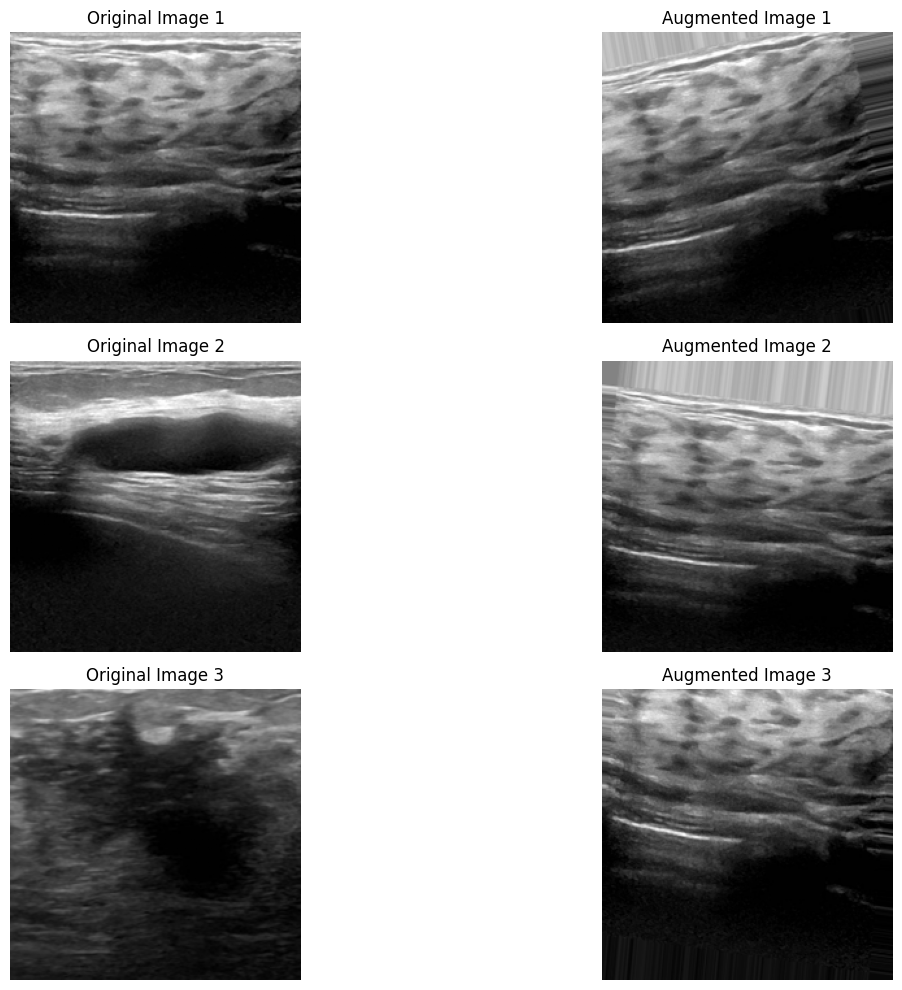

In [ ]:
# Display augmented images alongside original images

# Determine the number of images to display
num_images = min(6, len(images), len(augmented_images))

# Visualize original images alongside augmented images
plt.figure(figsize=(15, 10))

for i in range(num_images):
    # Original Image
    plt.subplot(num_images, 2, i*2 + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Original Image {i+1}')

    # Augmented Image
    plt.subplot(num_images, 2, i*2 + 2)
    plt.imshow(augmented_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}')

plt.tight_layout()
plt.show()

### d. Create labels
Labels are values or categories assigned to each data point in a dataset to represent its class or category. Labels are used in supervised learning to train machine learning models. In classification tasks, each data point is associated with a label that indicates its class or category.

Importance of Labels:

Supervision and Learning: They provide the model with the correct answers during training, enabling it to learn patterns and make predictions.

Model Evaluation: They enable us to compare the model's predictions to the ground truth and assess its accuracy and effectiveness.

Decision Making: In applications like medical diagnosis, labels are crucial for making informed decisions based on model predictions.

Understanding Data: Labels provide context and meaning to the data. They help interpret and understand the characteristics and distribution of different classes in the dataset.

Assigned labels to each category of images: 0 is assigned to normal images. 1 is assigned to benign images. 2 is assigned to malignant images.

In [ ]:
# Factor for the number of augmented images generated per original image
augmentation_factor = 20

# Create labels: 0 for normal, 1 for benign, 2 for malignant
normal_labels = np.zeros((len(normal_images_paths) * augmentation_factor,), dtype=int)
benign_labels = np.ones((len(benign_images_paths) * augmentation_factor,), dtype=int)
malignant_labels = np.full((len(malignant_images_paths) * augmentation_factor,), 2)

# Concatenate data and labels:

# Resize each image in X to the shape (224, 224)
X_images = [cv2.resize(img, (224, 224)) for img in augmented_images]

# Convert list of images back to numpy array
X = np.array(X_images)

# Expand dimensions to get the shape (15600, 224, 224, 1)
X = np.expand_dims(X, axis=-1)

# Combine the separate label arrays into a single array 'y' that holds all the labels
y = np.concatenate([normal_labels, benign_labels, malignant_labels])


In [ ]:
X.shape

(15600, 224, 224, 1)

In [ ]:
y.shape

(15600,)

**Intrepretations in summary:**

(15600, 224, 224, 1) describes the dimensions of the image data array. It means there are 15600 grayscale images, each with dimensions of 224 pixels in height and 224 pixels in width, and each image has a single color channel (grayscale). (15600,) under y.shape describes the dimensions of the label array. It means there are 15600 labels, one for each image in the dataset. These labels are used to indicate the class or category to which each image belongs, and they are in a one-dimensional array.

### e. Splitting the dataset

In this subsection, we divide our dataset into training, validation, and test sets in the ratios 7:1:2 respectively.

In summary, these lines of code are crucial for proper dataset management and model development. They ensure that the data is divided into training, validation, and test sets while maintaining the class distribution, allowing for the training and evaluation of machine learning models in a well-structured manner.

In [ ]:
# Define the ratios
train_ratio = 0.7
validation_ratio = 0.10
test_ratio = 0.20

# Split the data into a training set and a temporary set for validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=1 - train_ratio, random_state=42, stratify=y
)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=test_ratio, random_state=42, stratify=y_temp
)

# Output the shapes to verify the splits
X_train.shape, X_val.shape, X_test.shape

((10919, 224, 224, 1), (3744, 224, 224, 1), (937, 224, 224, 1))

In [ ]:
y_train.shape

(10919,)

In summary, these shapes provide information about the size and characteristics of each dataset split:

Training set: 10,919  grayscale images with dimensions 224x224 pixels. Validation set: 3,744 grayscale images with dimensions 224x224 pixels. Test set: 937 grayscale images with dimensions 224x224 pixels. These splits are essential for training, fine-tuning, and evaluating machine learning models for breast cancer classification.

# 4.0 Modeling

## 4.1 Baseline CNN Model

In summary, these lines of code set up a baseline CNN model for image classification, which is likely intended to distinguish between the Normal, Benign, and Malignant classes in the breast cancer ultrasound images dataset.

**Importance and Purpose:**
Model Definition: CNNs are especially suited for image-related tasks. They can automatically and adaptively learn spatial hierarchies of features from images. The defined model is a basic CNN structure that's suitable for image classification tasks.

*Model Compilation*: This step is necessary to configure the model for training. By specifying the optimizer, loss function, and metrics, we tell the model how it should be trained and evaluated.

**Model Summary: Providing a summary is beneficial for:**

Verifying the architecture: Ensuring that the model is constructed as intended.
Understanding Parameters: Seeing the total number of trainable parameters can give insights into potential overfitting, computational requirements, etc

*MaxPooling2D((2, 2))*: A max-pooling layer with a 2x2 pool size. It's used to reduce the spatial dimensions of the output volume from the previous layer, which helps reduce computation and can also help in reducing overfitting.

*Dense(3, activation='softmax')*: The output layer with 3 neurons, corresponding to the three categories (Normal, Benign, Malignant). It uses the softmax activation function to output a probability distribution over the three classes.

**Why is ReLU Popular and Important?**

*Non-linearity*: Even though it looks like a linear function, ReLU introduces non-linearity into the model. This means that the model can learn from the error and make adjustments, which is essential for learning complex patterns.

*Computational Efficiency:* ReLU is computationally efficient because it only requires a simple thresholding at zero. This allows models to train faster and requires less computational resources compared to activation functions like the sigmoid or tanh.

*Avoiding the Vanishing Gradient Problem:* Traditional activation functions like sigmoid or tanh squash their output into a small range between 0 and 1 or -1 and 1, respectively. During backpropagation, this can lead to tiny gradients and slow down learning or cause the network to stop learning altogether. ReLU, in most cases, does not have this problem because its gradient is either 0 (for negative values) or 1 (for positive values).

In [ ]:
# Define the model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Review the model summary
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

**Interpretations ;**

Total params: 23907203 (91.20 MB):

The model has a total of 23,907,203 trainable parameters. This number indicates the capacity of the model. With many parameters, the model can fit complex patterns.

**Significance of fitting the model;**

These lines of code are essential for the actual training of the CNN model, which is the core step in developing the intended machine learning model. Data augmentation helps the model become more robust by exposing it to a variety of data variations during training, reducing the risk of overfitting. Validation data is used to assess the model's performance on unseen data and make informed decisions about model adjustments. The number of epochs (50 in this case) indicates the model will iterate 50 times over the training data to refine its parameters. In summary, these lines of code are crucial for training and fine-tuning the CNN model, ensuring that it learns to make accurate predictions on breast cancer images while avoiding overfitting. The results variable is typically used to track and analyze the model's training progress, including metrics such as accuracy and loss over epochs

In [ ]:
# Fit the model
results = baseline_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50
171/171 [==============================] - 38s 214ms/step - loss: 0.4879 - accuracy: 0.7937 - val_loss: 0.4849 - val_accuracy: 0.7911
Epoch 2/50
171/171 [==============================] - 36s 211ms/step - loss: 0.4637 - accuracy: 0.8042 - val_loss: 0.4392 - val_accuracy: 0.8146
Epoch 3/50
171/171 [==============================] - 36s 209ms/step - loss: 0.4671 - accuracy: 0.8031 - val_loss: 0.4363 - val_accuracy: 0.8090
Epoch 4/50
171/171 [==============================] - 37s 215ms/step - loss: 0.4586 - accuracy: 0.8046 - val_loss: 0.5470 - val_accuracy: 0.7716
Epoch 5/50
171/171 [==============================] - 36s 212ms/step - loss: 0.4609 - accuracy: 0.8052 - val_loss: 0.4055 - val_accuracy: 0.8245
Epoch 6/50
171/171 [==============================] - 37s 214ms/step - loss: 0.4453 - accuracy: 0.8113 - val_loss: 0.3646 - val_accuracy: 0.8392
Epoch 7/50
171/171 [==============================] - 36s 212ms/step - loss: 0.4521 - accuracy: 0.8126 - val_loss: 0.5055 - val_ac

# Defination of terms and interpretation of Epoch results and guidelines;

**Epoch:**

An epoch represents one complete forward and backward pass of all the training samples through the neural network.
For example, "Epoch 1/50" indicates the first pass out of a total of 50 passes.

**ms/step:**

This represents the average time taken (in milliseconds) to process a single batch of data. A smaller value means faster processing.

**loss:**

This is the value of the loss function (in this case, sparse categorical cross-entropy) calculated from the training data. It's an indication of how far the model's predictions are from the actual labels. A lower loss indicates better performance.

**accuracy:**

This is the proportion of correctly classified images in the training set. A higher accuracy indicates better performance.

**val_loss:**

This is the value of the loss function calculated using the validation data. It helps in gauging how well the model is likely to perform on unseen data.

**val_accuracy**:

This is the proportion of correctly classified images in the validation set.

**Implications for Breast Cancer Image Detection**:

**Training Progression:**

The model started with a training accuracy of 79.37% in the first epoch and improved to 88.52% by the 50th epoch. Similarly, the validation accuracy started at 79.11% and reached 89.53% by the end.

**Model Performance:**

The model's training and validation accuracies are quite close, suggesting a balanced model without significant overfitting.

**Convergence:**

The steady decrease in both training and validation loss values across epochs indicates that the model is converging, learning from the data, and improving its predictions.

**Validation Metrics:**

The validation metrics (val_loss and val_accuracy) provide insights into how the model might perform on new, unseen data. A high validation accuracy (89.53% in this case) suggests that the model is likely to classify a significant portion of new breast cancer images correctly.

**In Summary:**

The model has been trained for 50 epochs and has shown consistent improvement in its ability to classify breast cancer images into their respective categories. By the end of the 50 epochs, the model achieved a training accuracy of 88.52% and a validation accuracy of 89.53%. These metrics suggest that the model has learned meaningful patterns from the images and is expected to perform well on new, unseen data. However, continuous monitoring of the model's performance in real-world scenarios is essential to ensure its effectiveness.







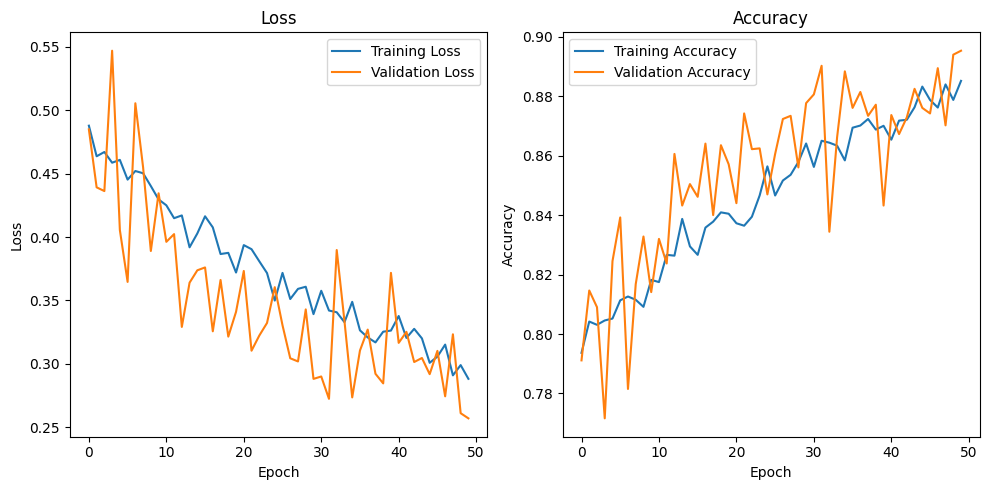

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results.history['loss']
validation_loss = results.history['val_loss']
training_accuracy = results.history['accuracy']
validation_accuracy = results.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

30/30 [==============================] - 1s 14ms/step - loss: 0.2547 - accuracy: 0.8986
Test Loss: 0.2547
Test Accuracy: 0.8986


In [ ]:
# Predict classes for validation set
y_pred = baseline_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes))

117/117 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       638
           1       0.91      0.92      0.91      2098
           2       0.84      0.82      0.83      1008

    accuracy                           0.90      3744
   macro avg       0.89      0.89      0.89      3744
weighted avg       0.89      0.90      0.89      3744



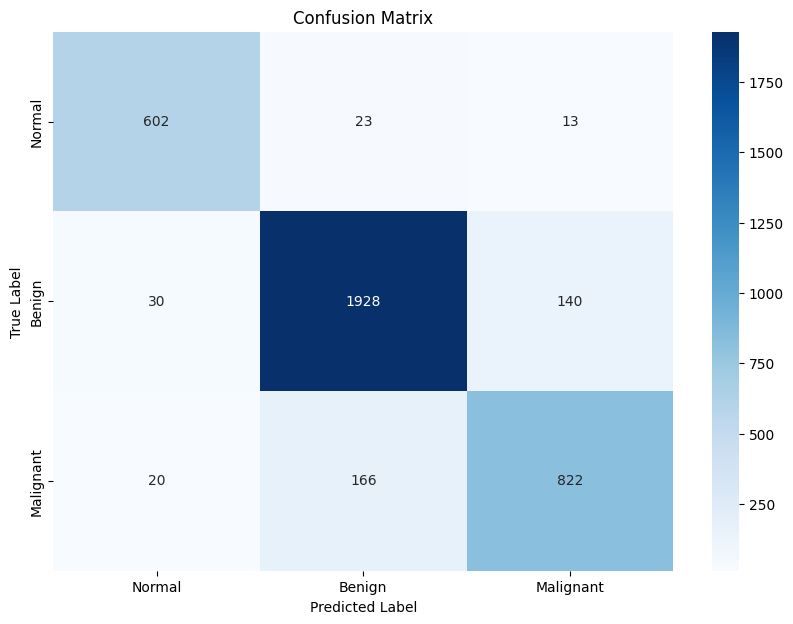

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the baseline model
baseline_model.save('baseline_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 4.2 Baseline model with added layers

In [ ]:
# Define the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model_2.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Review the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)     

In [ ]:
# Fit the model
results_2 = model_2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks = [early_stopping]
)

Epoch 1/50
171/171 [==============================] - 46s 247ms/step - loss: 1.2116 - accuracy: 0.5246 - val_loss: 1.9282 - val_accuracy: 0.3304
Epoch 2/50
171/171 [==============================] - 41s 238ms/step - loss: 0.8920 - accuracy: 0.6076 - val_loss: 6.0139 - val_accuracy: 0.5588
Epoch 3/50
171/171 [==============================] - 41s 239ms/step - loss: 0.7663 - accuracy: 0.6534 - val_loss: 1.2815 - val_accuracy: 0.6173
Epoch 4/50
171/171 [==============================] - 41s 238ms/step - loss: 0.7308 - accuracy: 0.6697 - val_loss: 1.4498 - val_accuracy: 0.6063
Epoch 5/50
171/171 [==============================] - 41s 238ms/step - loss: 0.7522 - accuracy: 0.6701 - val_loss: 0.8327 - val_accuracy: 0.6576
Epoch 6/50
171/171 [==============================] - 41s 237ms/step - loss: 0.6865 - accuracy: 0.6929 - val_loss: 0.7859 - val_accuracy: 0.6482
Epoch 7/50
171/171 [==============================] - 40s 234ms/step - loss: 0.6261 - accuracy: 0.7260 - val_loss: 1.6252 - val_ac

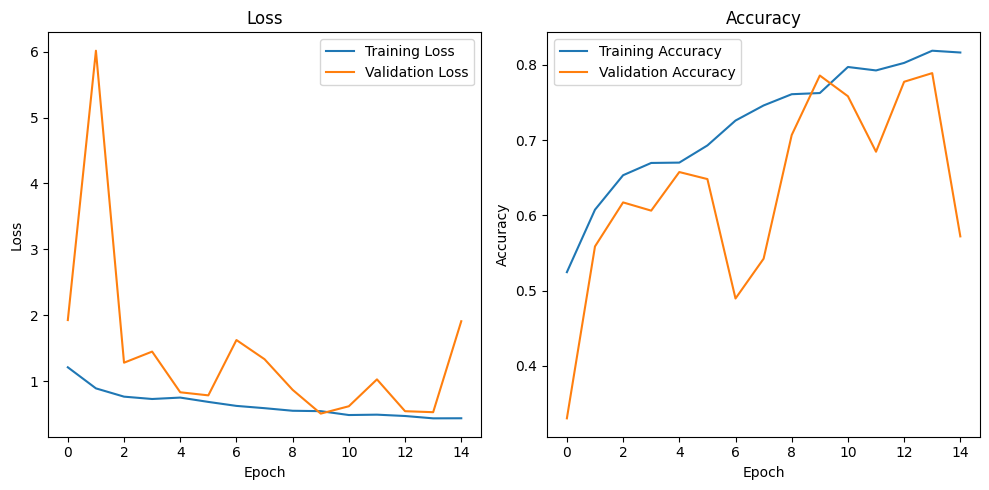

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results_2.history['loss']
validation_loss = results_2.history['val_loss']
training_accuracy = results_2.history['accuracy']
validation_accuracy = results_2.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_2:.4f}")
print(f"Test Accuracy: {test_accuracy_2:.4f}")

30/30 [==============================] - 1s 19ms/step - loss: 0.5207 - accuracy: 0.7940
Test Loss: 0.5207
Test Accuracy: 0.7940


In [ ]:
# Predict classes for validation set
y_pred_2 = model_2.predict(X_val)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_2))

117/117 [==============================] - 2s 15ms/step
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       638
           1       0.84      0.85      0.85      2098
           2       0.79      0.54      0.64      1008

    accuracy                           0.79      3744
   macro avg       0.76      0.78      0.76      3744
weighted avg       0.80      0.79      0.78      3744



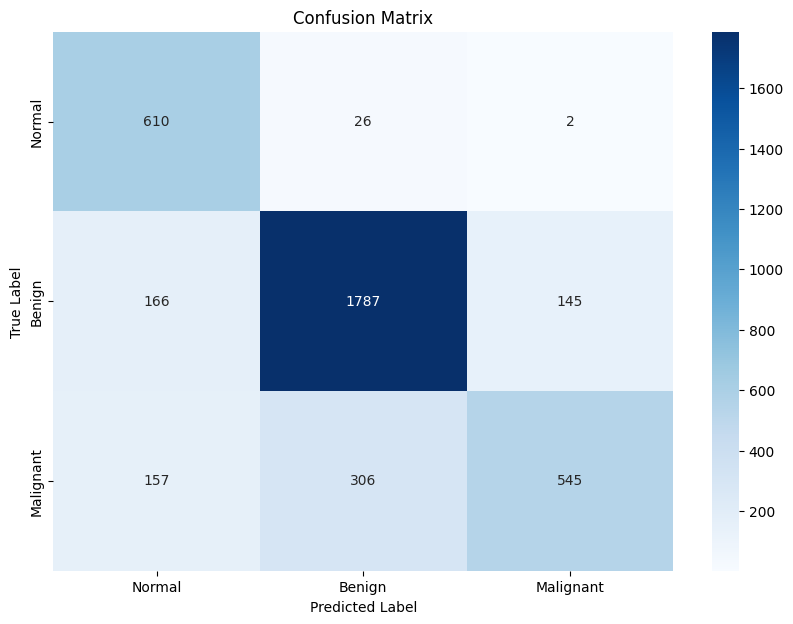

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_2)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the second model
model_2.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 4.3 Pretrained model: VGG16

In [ ]:
from keras.models import Model

vgg = VGG16(input_shape = (224, 224, 1), weights=None, include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
output = Dense(3, activation='softmax')(x)

model_3 = Model(inputs=vgg.input, outputs=output)

# Compile the model
model_3.compile(
  loss= 'sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Review model summary
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Fit the model
results_3 = model_3.fit(datagen.flow(
    X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50
171/171 [==============================] - 80s 412ms/step - loss: 1.0136 - accuracy: 0.5339 - val_loss: 0.8724 - val_accuracy: 0.6034
Epoch 2/50
171/171 [==============================] - 59s 344ms/step - loss: 0.8988 - accuracy: 0.5716 - val_loss: 0.8771 - val_accuracy: 0.5756
Epoch 3/50
171/171 [==============================] - 59s 342ms/step - loss: 0.8888 - accuracy: 0.5779 - val_loss: 0.8002 - val_accuracy: 0.6263
Epoch 4/50
171/171 [==============================] - 58s 340ms/step - loss: 0.8747 - accuracy: 0.5891 - val_loss: 0.9222 - val_accuracy: 0.5788
Epoch 5/50
171/171 [==============================] - 59s 343ms/step - loss: 0.8368 - accuracy: 0.6125 - val_loss: 0.8292 - val_accuracy: 0.6202
Epoch 6/50
171/171 [==============================] - 58s 341ms/step - loss: 0.8289 - accuracy: 0.6155 - val_loss: 0.9633 - val_accuracy: 0.4704
Epoch 7/50
171/171 [==============================] - 59s 342ms/step - loss: 0.8433 - accuracy: 0.6064 - val_loss: 0.7703 - val_ac

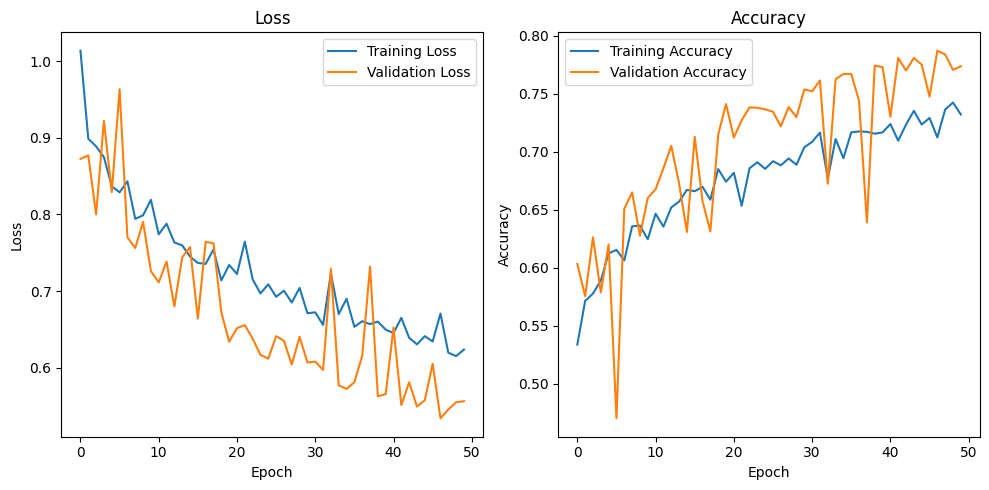

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results_3.history['loss']
validation_loss = results_3.history['val_loss']
training_accuracy = results_3.history['accuracy']
validation_accuracy = results_3.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_3:.4f}")
print(f"Test Accuracy: {test_accuracy_3:.4f}")

30/30 [==============================] - 6s 180ms/step - loss: 0.5730 - accuracy: 0.7620
Test Loss: 0.5730
Test Accuracy: 0.7620


In [ ]:
# Predict classes for validation set
y_pred_3 = model_3.predict(X_val)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_3))

117/117 [==============================] - 15s 128ms/step
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       638
           1       0.81      0.88      0.84      2098
           2       0.86      0.47      0.61      1008

    accuracy                           0.77      3744
   macro avg       0.77      0.75      0.73      3744
weighted avg       0.79      0.77      0.76      3744



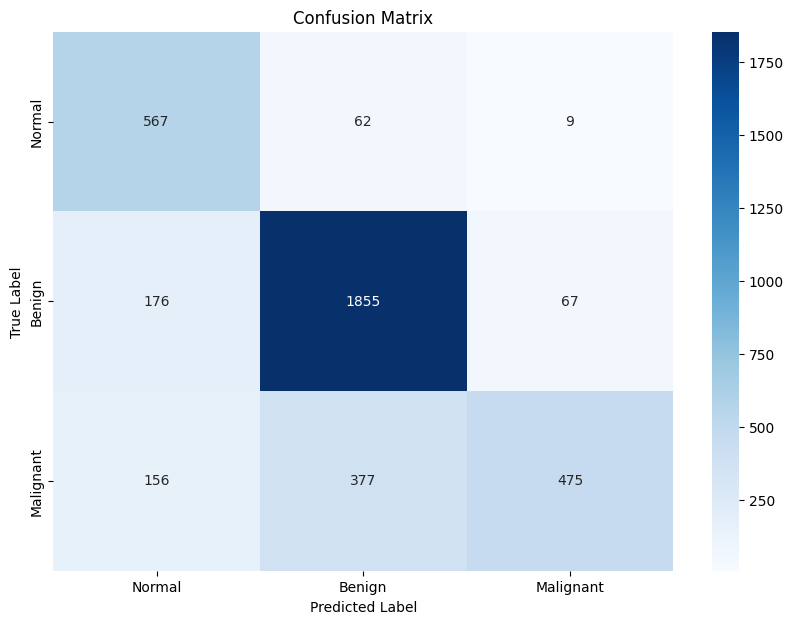

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_3)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the third model
model_3.save('model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5.0 Model Evaluation

## 5.1 Model comparison

In [ ]:
# Print results for the three models used
models = [baseline_model, model_2, model_3]
model_names = ["baseline_model", "model_2", "model_3"]
classes = ['normal', 'benign', 'malignant']

# Define a result table as a DataFrame
columns = ['models', 'accuracy'] + [f"recall_{cls}" for cls in classes]
result_table = pd.DataFrame(columns=columns)

# Evaluate the models and record the results
for idx, model in enumerate(models):
    model_name = model_names[idx]
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Overall accuracy
    accuracy = accuracy_score(y_val, y_pred_classes)

    # Class-wise recall
    recalls = recall_score(y_val, y_pred_classes, average=None)

    # Construct the results row
    results = {'models': model_name, 'accuracy': accuracy}
    results.update({f"recall_{cls}": recalls[i] for i, cls in enumerate(classes)})

    result_table = pd.concat([result_table, pd.DataFrame([results])], ignore_index=True)

# Set the name of the models as index labels
result_table.set_index('models', inplace=True)

result_table

117/117 [==============================] - 15s 132ms/step


accuracy  recall_normal  recall_benign  recall_malignant
models                                                                  
baseline_model  0.895299       0.943574       0.918970          0.815476
model_2         0.785791       0.956113       0.851764          0.540675
model_3         0.773771       0.888715       0.884175          0.471230

## 5.1 Tuning the best model

In [ ]:
# # Define the model creation function
# def create_model(optimizer='adam'):
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dense(3, activation='softmax')
#     ])
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Define hyperparameters
# optimizers = ['adam']
# batch_sizes = [16, 32, 64]
# epochs_list = [30, 40, 50, 100]

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# # Grid search
# best_score = 0
# best_params = None

# for optimizer in optimizers:
#     for batch_size in batch_sizes:
#         for epochs in epochs_list:
#             model = create_model(optimizer)
#             history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
#                                 epochs=epochs,
#                                 validation_data=(X_val, y_val),
#                                 callbacks=[early_stopping],
#                                 verbose=0)
#             val_accuracy = max(history.history['val_accuracy'])
#             print(f"Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, Validation Accuracy: {val_accuracy:.4f}")

#             if val_accuracy > best_score:
#                 best_score = val_accuracy
#                 best_params = (optimizer, batch_size, epochs)

# print("\\nBest Parameters:")
# print(f"Optimizer: {best_params[0]}, Batch Size: {best_params[1]}, Epochs: {best_params[2]}, Best Validation Accuracy: {best_score:.4f}")


In [ ]:
tuned_baseline = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
tuned_baseline.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Review the model summary
tuned_baseline.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
# Tune the parameters on the best performing model
epochs = 25
batch_size=64

# Fit the best performing model
best_results = tuned_baseline.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

Epoch 1/25
171/171 [==============================] - 37s 216ms/step - loss: 0.2634 - accuracy: 0.8896 - val_loss: 0.2921 - val_accuracy: 0.8897
Epoch 2/25
171/171 [==============================] - 36s 211ms/step - loss: 0.2642 - accuracy: 0.8954 - val_loss: 0.2657 - val_accuracy: 0.8934
Epoch 3/25
171/171 [==============================] - 36s 211ms/step - loss: 0.2689 - accuracy: 0.8954 - val_loss: 0.2514 - val_accuracy: 0.8958
Epoch 4/25
171/171 [==============================] - 36s 212ms/step - loss: 0.2638 - accuracy: 0.8944 - val_loss: 0.2333 - val_accuracy: 0.9129
Epoch 5/25
171/171 [==============================] - 36s 208ms/step - loss: 0.2658 - accuracy: 0.8907 - val_loss: 0.2657 - val_accuracy: 0.8892
Epoch 6/25
171/171 [==============================] - 36s 210ms/step - loss: 0.2622 - accuracy: 0.8938 - val_loss: 0.3023 - val_accuracy: 0.8843
Epoch 7/25
171/171 [==============================] - 36s 211ms/step - loss: 0.2650 - accuracy: 0.8931 - val_loss: 0.2789 - val_ac

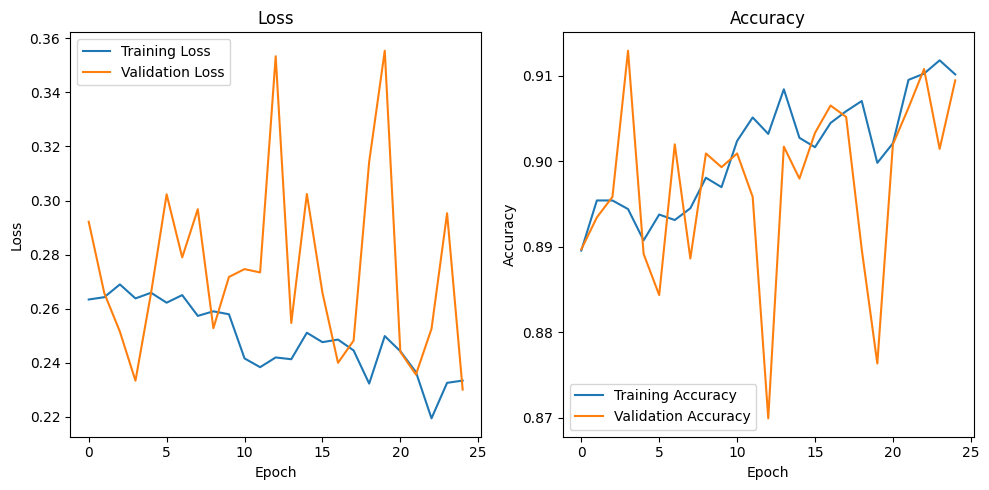

In [ ]:
# Visualize loss and accuracy metrics
training_loss = best_results.history['loss']
validation_loss = best_results.history['val_loss']
training_accuracy = best_results.history['accuracy']
validation_accuracy = best_results.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_4, test_accuracy_4 = tuned_baseline.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_4:.4f}")
print(f"Test Accuracy: {test_accuracy_4:.4f}")

30/30 [==============================] - 0s 11ms/step - loss: 0.2342 - accuracy: 0.9072
Test Loss: 0.2342
Test Accuracy: 0.9072


In [ ]:
# Predict classes for validation set
y_pred_4 = tuned_baseline.predict(X_val)
y_pred_classes_4 = np.argmax(y_pred_4, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_4))

117/117 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       638
           1       0.91      0.94      0.92      2098
           2       0.87      0.84      0.85      1008

    accuracy                           0.91      3744
   macro avg       0.92      0.90      0.91      3744
weighted avg       0.91      0.91      0.91      3744



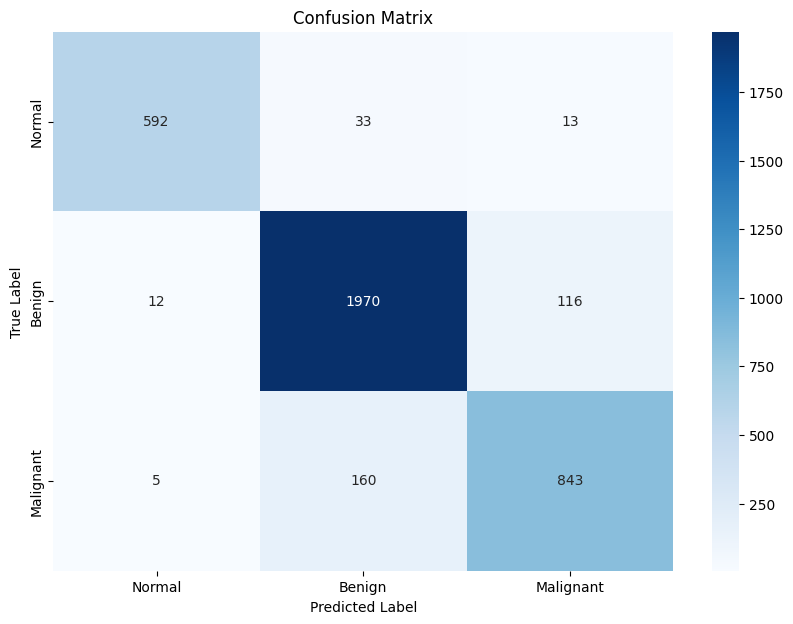

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_4)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
tuned_baseline.save('tuned_baseline.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
